In [35]:
import os
import pandas as pd

from pyannote.core import Segment, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

In [36]:
def txt2annotation(path_txt, annotation=Annotation()):
    #check if file is txt of csv
    if path_txt.endswith('.txt'):
        with open(path_txt, 'r') as f:
            for line in f:
                if len(line) == 0:
                    continue
                start, end, speaker = line.split()
                speaker = speaker.lower()
                annotation[Segment(float(start), float(end))] = speaker
            return annotation
    elif path_txt.endswith('.csv'):
        diarization = pd.read_csv(path_txt)
        for index, row in diarization.iterrows():
            start = row['start [s]']
            end = row['end [s]']
            speaker = row['speaker']
            annotation[Segment(float(start), float(end))] = speaker
        return annotation

# Primero, una prueba sencilla

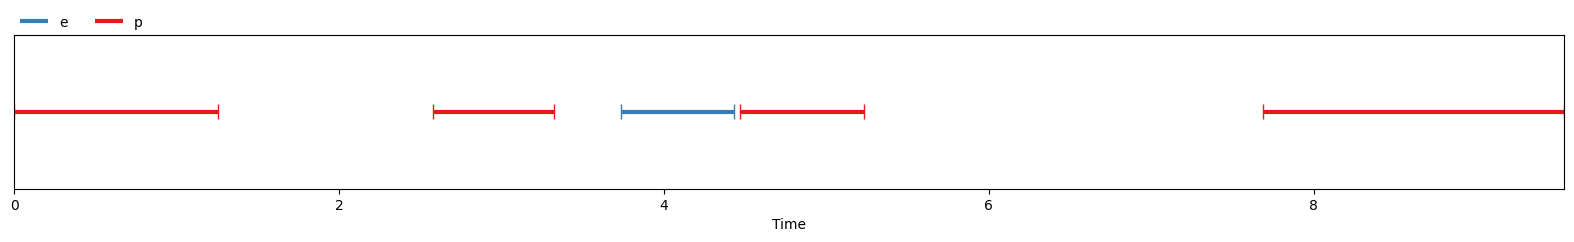

In [5]:
# reference annotation
reference_path = os.path.join('combined_database', 'reference', 'NP', 'CETRAM_AMG-0009_VocalSostenida.txt')
reference = txt2annotation(reference_path, annotation=Annotation(uri='test'))
reference

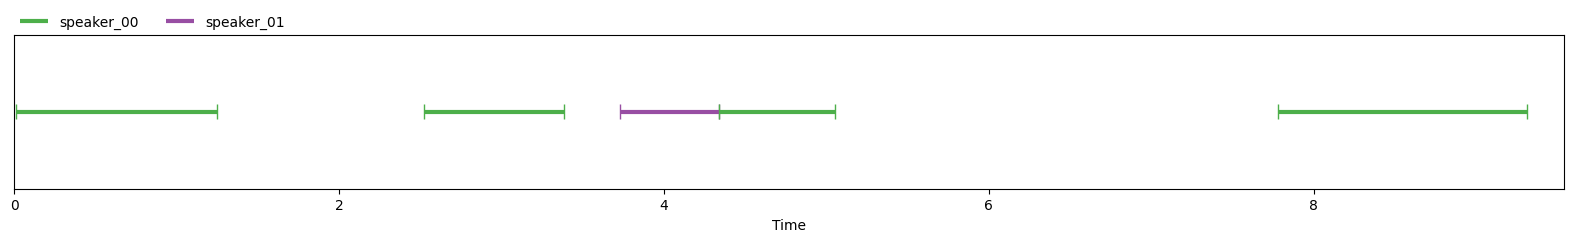

In [6]:
# hypothesis annotation
hypothesis_path = os.path.join('combined_database', 'hypothesis', 'NP', 'CETRAM_AMG-0009_VocalSostenida.txt')
hypothesis = txt2annotation(hypothesis_path, annotation=Annotation(uri='test'))
hypothesis

In [7]:
# DER
metric(reference, hypothesis, detailed=True)

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


{'confusion': 0.09477599999999953,
 'correct': 4.696732,
 'missed detection': 0.5278220000000011,
 'false alarm': 0.1664920000000003,
 'total': 5.319330000000001,
 'diarization error rate': 0.1483438703746526}

In [8]:
# full report and reset metric
report = metric.report(display=True)
metric.reset()

      diarization error rate total correct correct false alarm false alarm missed detection missed detection confusion confusion
                           %                     %                       %                                 %                   %
item                                                                                                                            
test                   14.83  5.32    4.70   88.30        0.17        3.13             0.53             9.92      0.09      1.78
TOTAL                  14.83  5.32    4.70   88.30        0.17        3.13             0.53             9.92      0.09      1.78


# Ahora obtengamos un DER para todos los pares reference - hypothesis de la base combinada

In [44]:
# find all txt files in reference directory
reference_dir = os.path.join('combined_database', 'reference2')
reference_files = [f for f in os.listdir(reference_dir) if f.endswith('.txt')]
# os walk to find all txt files in reference directory
count = 0
for root, dirs, files in os.walk(reference_dir):
    for file in files:
        if file.endswith('.txt'):
                try:
                    reference_path = (os.path.join(root, file))
                    annotation = Annotation(uri=file)
                    reference = txt2annotation(reference_path, annotation)

                    # find corresponding hypothesis file
                    hypothesis_path = reference_path.replace('reference2', 'hypothesis2')
                    hypothesis_path = hypothesis_path.replace('.txt', '_diarization.csv')
                    annotation = Annotation(uri=file)
                    hypothesis = txt2annotation(hypothesis_path, annotation)

                    # compute DER
                    metric(reference, hypothesis, detailed=True)
                except:
                    print('Error in file: ', reference_path)


reference_dir = os.path.join('combined_database', 'reference')
reference_files = [f for f in os.listdir(reference_dir) if f.endswith('.txt')]
# os walk to find all txt files in reference directory
count = 0
for root, dirs, files in os.walk(reference_dir):
    for file in files:
        if file.endswith('.txt'):
                try:
                    reference_path = (os.path.join(root, file))
                    annotation = Annotation(uri=file)
                    reference = txt2annotation(reference_path, annotation)

                    # find corresponding hypothesis file
                    hypothesis_path = reference_path.replace('reference', 'hypothesis')
                    # hypothesis_path = hypothesis_path.replace('.txt', '_diarization.csv')
                    annotation = Annotation(uri=file)
                    hypothesis = txt2annotation(hypothesis_path, annotation)

                    # compute DER
                    metric(reference, hypothesis, detailed=True)
                except:
                    print('Error in file: ', reference_path)


# cumulative report
print(abs(metric))
report = abs(metric.report(display=True))
report.to_csv('DER_report.csv')
metric.reset() # reset metric for next iteration

/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

Error in file:  combined_database/reference2/FA/FONDECYT_SL0046_Lamina1.txt
Error in file:  combined_database/reference2/FA/Slachevsky_AD_35_Dia_Tipico.txt
Error in file:  combined_database/reference2/FA/Slachevsky_AD_43_Intereses.txt


/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

Error in file:  combined_database/reference2/MA/FONDECYT_SL00372_Lectura.txt


/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
/home/aleph/diariziation_error_rate/.env/lib/python3.10/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and

0.6005309260238442
                                         diarization error rate    total  correct correct false alarm false alarm missed detection missed detection confusion confusion
                                                              %                         %                       %                                 %                   %
item                                                                                                                                                                   
GERO_COH_125_Fugu.txt                                     26.30    32.27    23.79   73.70        0.00        0.00             8.49            26.30      0.00      0.00
CETRAM_AMG-0031_RecuerdoAgradable.txt                     19.86    41.62    34.69   83.36        1.34        3.22             5.08            12.21      1.85      4.44
Slachevsky_AD_13_s.txt                                    66.36    11.65     4.85   41.60        0.93        7.96             4.30           

In [ ]:
FONDECYT_SL0046_Lamina1_diarization.csv
FONDECYT_SL00346_Lamina1_diarization

### Rename hypothesis files in case they have the _diarized suffix

In [10]:
# # change the name of files in
# # combined_database/hypothesis/XX, deleting the suffix "_diarization"

# find all txt files in hypothesis directory
# hypothesis_dir = os.path.join('combined_database', 'hypothesis', 'AS')
# for f in os.listdir(hypothesis_dir):
#     if f.endswith('_diarization.txt'):
#         os.rename(os.path.join(hypothesis_dir, f), os.path.join(hypothesis_dir, f.replace('_diarization', '')))